# Becomexpert AI Course: HW3 -- Sajad Chelabi
## Title: Customer Sgementation
### Unsupervised customer segmentation on 'Wholesale Customers Dataset' that contains information about customer's annual spending on various product categories.

In [20]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, IntSlider, FloatLogSlider, ToggleButtons

## Import Data

In [21]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
df.describe()      # Check overview of the dataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Task 1: Preprocessing
### Preprocess and clean the data

In [23]:
df.drop_duplicates(inplace=True)           # Remove all duplicated data
df.reset_index(drop=True, inplace=True)    # Reset and replace index after hanling duplicated
df.info()                                  # check null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [24]:
print(df.Channel.value_counts().to_frame())        # Check out of range values of the Channel feature
print(df.Region.value_counts().to_frame())         # Check out of range values of the Region feature

         count
Channel       
1          298
2          142
        count
Region       
3         316
1          77
2          47


#### So, after data cleaning (handle duplicated, null values, data types, and out of range samples) make the data ready for processing.

## Task 2: Anomaly Detection
### Use anomaly detection techniques to find the abnormal instances
#### At the first step, consider several anomaly detection techniques and check their performance by using pair plot.

In [25]:
# Import three anomaly detection algorithms
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [53]:
# Create four ranodm pairs of feaatures
p1 = np.array(df[['Fresh', 'Grocery']])
p2 = np.array(df[['Milk', 'Frozen']])
p3 = np.array(df[['Detergents_Paper', 'Delicassen']])
p4 = np.array(df[['Fresh', 'Frozen']])

In [54]:
# Create each algs object
iso = IsolationForest(contamination=0.01, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
one = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')

# Create each algs prediction
y_pred_iso = [iso.fit_predict(p1), iso.fit_predict(p2), iso.fit_predict(p3), iso.fit_predict(p4)]
y_pred_lof = [lof.fit_predict(p1), lof.fit_predict(p2), lof.fit_predict(p3), lof.fit_predict(p4)]
y_pred_one = [one.fit_predict(p1), one.fit_predict(p2), one.fit_predict(p3), one.fit_predict(p4)]
y_pred = [y_pred_iso, y_pred_lof, y_pred_one]

# Create plot function in order to use box button to choose each algs
def plot_anomaly(anomaly_algs):
    if anomaly_algs == 'Isolation Forest':
        p = y_pred[0]
    elif anomaly_algs == 'Local Outlier Factor':
        p = y_pred[1]
    else:
        p = y_pred[2]
        
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    
    # Visualize Pair 1
    axes[0,0].scatter(p1[:, 0], p1[:, 1], c=p[0], cmap='viridis', edgecolor='k')
    axes[0,0].set_title('Anomaly Detection')
    axes[0,0].set_xlabel('Fresh')
    axes[0,0].set_ylabel('Grocery')

    # Visualize Pair 2
    axes[0,1].scatter(p2[:, 0], p2[:, 1], c=p[1], cmap='viridis', edgecolor='k')
    axes[0,1].set_title('Anomaly Detection')
    axes[0,1].set_xlabel('Milk')
    axes[0,1].set_ylabel('Frozen')

    # Visualize Pair 3
    axes[1,0].scatter(p3[:, 0], p3[:, 1], c=p[2], cmap='viridis', edgecolor='k')
    axes[1,0].set_title('Anomaly Detection')
    axes[1,0].set_xlabel('Detergents_Paper')
    axes[1,0].set_ylabel('Delicassen')

    # Visualize Pair 4
    axes[1,1].scatter(p4[:, 0], p4[:, 1], c=p[3], cmap='viridis', edgecolor='k')
    axes[1,1].set_title('Anomaly Detection')
    axes[1,1].set_xlabel('Fresh')
    axes[1,1].set_ylabel('Frozen')

    plt.tight_layout()
    plt.show()
        
box = ToggleButtons(
    options=['Isolation Forest', 'Local Outlier Factor', 'One Class SVM'],
    description='Select anomaly detection technique:',
    disabled=False,
    button_style='',
    tooltips=['Isolation Forest', 'Local Outlier Factor', 'One Class SVM']
)

interact(plot_anomaly, anomaly_algs=box)

interactive(children=(ToggleButtons(description='Select anomaly detection technique:', options=('Isolation For…

<function __main__.plot_anomaly(anomaly_algs)>

#### After change all anomaly algs hyper parameters and see the results, it can be concluded that the 'One Class SVM' is not a good alg at all in this scenario. The other two algs are very compatible. So, choose LOF to find abnormal instances along whole data (with all 8 feature instead of pairs)

In [28]:
y_pred_final = lof.fit_predict(np.array(df))              # Create final chose anomaly detection alg predctions
df.drop(np.where(y_pred_final == -1)[0], inplace=True)    # Remove abnormal instances from dataset
df.reset_index(drop=True, inplace=True)                   # Update index
df.info()                                                 # Check final cleaned dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           435 non-null    int64
 1   Region            435 non-null    int64
 2   Fresh             435 non-null    int64
 3   Milk              435 non-null    int64
 4   Grocery           435 non-null    int64
 5   Frozen            435 non-null    int64
 6   Detergents_Paper  435 non-null    int64
 7   Delicassen        435 non-null    int64
dtypes: int64(8)
memory usage: 27.3 KB


## Task 3: Clustering
### Use sufficient clustering models for customer segmentation regarding the processed dataset

In [29]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score      # Using silhouette score to find best n_clusters

In [55]:
scaler = StandardScaler()         # Create scaler object
X = scaler.fit_transform(df)      # Create normalized data

<IPython.core.display.Javascript object>


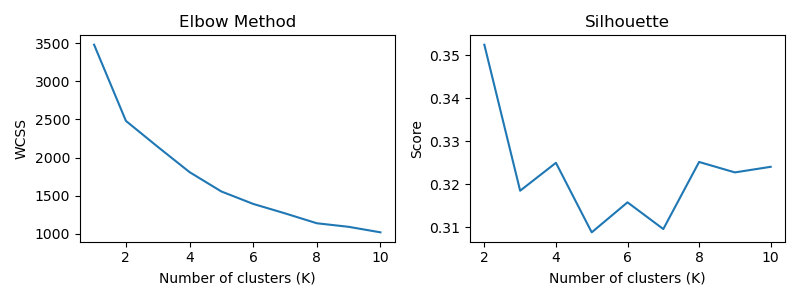

In [58]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):  # Silhouette Score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8,3))

axes[0].plot(range(1,11), wcss)
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of clusters (K)')
axes[0].set_ylabel('WCSS')

axes[1].plot(range(2,11), silhouette_scores)
axes[1].set_title('Silhouette')
axes[1].set_xlabel('Number of clusters (K)')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

#### According to elbow method, best number of cluster for kmeans is 2.

### Create several clustering algorithms object and save their clusters label as a parameter for further visualization.

In [59]:
# Clustering algs
# KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
y_km = kmeans.labels_          # KMeans clusters label

# MeanShift
bandwidth = estimate_bandwidth(X, quantile=0.5, n_samples=20)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)
y_ms = meanshift.labels_       # MeanShift clusters label

# Agglomerative
agglomerative = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(X)
y_ag = agglomerative.labels_   # Agglomerative clusters label

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=20).fit(X)
y_db = dbscan.labels_          # DBSCAN clusters label

# OPTICS
optics = OPTICS(min_samples=20).fit(X)
y_op = optics.labels_          # OPTICS clusters label

## Task 4: Dimensionality Reduction
### Use dimensionality reduction techniques to present the results

In [60]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, MDS

In [61]:
# Create each algs object and make dimensionality reduction on data to 2 features
pca = PCA(2).fit_transform(X)               # principal component analysis
ica = FastICA(2).fit_transform(X)           # fast independent component analysis
tsne = TSNE(2).fit_transform(X)             # t-distributed stochastic neighbor embedding
mds = MDS(2).fit_transform(X)               # multi dimensional scaling

# Create plot function in order to use box button to choose each algs
def plot_clusters(clustering_algs):          # Define function to assign each clustering labels
    if clustering_algs == 'KMeans':
        c = y_km
    elif clustering_algs == 'MeanShift':
        c = y_ms
    elif clustering_algs == 'Agglomerative':
        c = y_ag
    elif clustering_algs == 'DBSCAN':
        c = y_db
    else:
        c = y_op
        
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    
    # Visualize PCA
    axes[0,0].scatter(pca[:, 0], pca[:, 1], c=c, cmap='viridis', edgecolor='k')
    axes[0,0].set_title('PCA')
    axes[0,0].set_xlabel('Feature 1')
    axes[0,0].set_ylabel('Feature 2')

    # Visualize FastICA
    axes[0,1].scatter(ica[:, 0], ica[:, 1], c=c, cmap='viridis', edgecolor='k')
    axes[0,1].set_title('FastICA')
    axes[0,1].set_xlabel('Feature 1')
    axes[0,1].set_ylabel('Feature 2')

    # Visualize t-SNE
    axes[1,0].scatter(tsne[:, 0], tsne[:, 1], c=c, cmap='viridis', edgecolor='k')
    axes[1,0].set_title('t-SNE')
    axes[1,0].set_xlabel('Feature 1')
    axes[1,0].set_ylabel('Feature 2')

    # Visualize MDS
    axes[1,1].scatter(mds[:, 0], mds[:, 1], c=c, cmap='viridis', edgecolor='k')
    axes[1,1].set_title('MDS')
    axes[1,1].set_xlabel('Feature 1')
    axes[1,1].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()
        
# Create Box button in order to choose the type of clustering method
box = ToggleButtons(
    options=['KMeans', 'MeanShift', 'Agglomerative', 'DBSCAN', 'OPTICS'],
    description='Select clustering algorithm:',
    disabled=False,
    button_style='',
    tooltips=['KMeans', 'MeanShift', 'Agglomerative', 'DBSCAN', 'OPTICS']
)

interact(plot_clusters, clustering_algs=box)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


interactive(children=(ToggleButtons(description='Select clustering algorithm:', options=('KMeans', 'MeanShift'…

<function __main__.plot_clusters(clustering_algs)>

## Results

### 1- MeanShift and OPTICS have bad performance on this dataset.
### 2- KMeans and Agglomerative (with ward linkage) split the samples into 2 clusters, but DBSCAN create 3 cluster from them. 
### 3- Best dimensionality reduction technique on this dataset is MDS.
### 4- Best clustering algorithm on this dataset is DBSCAN (recognize outliers and consider them as an extra cluster)